In [241]:
'''import applicable modules and set plot style'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import math
# import datetime
# %matplotlib inline
sns.set_style('darkgrid')

In [242]:
'''import the data'''

circuits_df = pd.read_csv('circuits.csv')
constructor_results_df = pd.read_csv('constructor_results.csv')
constructor_standings_df = pd.read_csv('constructor_standings.csv')
constructors_df = pd.read_csv('constructors.csv')
driver_standings_df = pd.read_csv('driver_standings.csv')
drivers_df = pd.read_csv('drivers.csv')
lap_times_df = pd.read_csv('lap_times.csv')
pit_stops_df = pd.read_csv('pit_stops.csv')
qualifying_df = pd.read_csv('qualifying.csv')
races_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')
seasons_df = pd.read_csv('seasons.csv')
sprint_results_df = pd.read_csv('sprint_results.csv')
status_df = pd.read_csv('status.csv')

# Most Successful Teams

In [243]:
merge1 = constructor_standings_df.merge(races_df, on='raceId', how='left', suffixes=('_c_s','_r'))
df = merge1.merge(constructors_df, on='constructorId', how='left', suffixes=(None,'_co'))

In [244]:
# replace /N with NaN
df.replace('\\N',None, inplace=True)

In [245]:
df.columns

Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins', 'year', 'round', 'circuitId',
       'name', 'date', 'time', 'url', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time',
       'sprint_date', 'sprint_time', 'constructorRef', 'name_co',
       'nationality', 'url_co'],
      dtype='object')

In [246]:
# drop unwanted columns
cols_to_drop = ['circuitId', 'date', 'time', 'url', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time',
       'sprint_date', 'sprint_time', 'nationality', 'url_co']
df.drop(cols_to_drop, axis=1, inplace=True)

In [247]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
constructorStandingsId,12931.0,16564.665996,8739.173340,1.0,8768.5,20119.0,24584.5,28402.0
raceId,12931.0,514.554095,292.222557,1.0,294.0,493.0,714.0,1096.0
constructorId,12931.0,48.033795,59.358214,1.0,6.0,25.0,57.0,214.0
points,12931.0,33.802606,76.899408,0.0,0.0,6.0,31.0,765.0
position,12931.0,7.287449,4.387007,1.0,4.0,7.0,10.0,22.0
wins,12931.0,0.679452,1.819341,0.0,0.0,0.0,0.0,19.0
year,12931.0,1991.757095,17.354370,1958.0,1978.0,1990.0,2007.0,2022.0
round,12931.0,8.767071,4.897846,1.0,5.0,8.0,13.0,22.0


In [248]:
# sort values
df = df.sort_values(by=['constructorId', 'year', 'round'])
df

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,year,round,name,constructorRef,name_co
9603,21034,674,1,0.0,14,14,0,1968,8,German Grand Prix,mclaren,McLaren
9597,21051,675,1,0.0,14,14,0,1968,9,Italian Grand Prix,mclaren,McLaren
9591,21068,676,1,0.0,14,14,0,1968,10,Canadian Grand Prix,mclaren,McLaren
9585,21085,677,1,0.0,14,14,0,1968,11,United States Grand Prix,mclaren,McLaren
9579,21102,678,1,0.0,14,14,0,1968,12,Mexican Grand Prix,mclaren,McLaren
...,...,...,...,...,...,...,...,...,...,...,...,...
12888,28327,1092,214,143.0,4,4,0,2022,18,Japanese Grand Prix,alpine,Alpine F1 Team
12893,28367,1093,214,149.0,4,4,0,2022,19,United States Grand Prix,alpine,Alpine F1 Team
12907,28377,1094,214,153.0,4,4,0,2022,20,Mexico City Grand Prix,alpine,Alpine F1 Team
12915,28387,1095,214,167.0,4,4,0,2022,21,Brazilian Grand Prix,alpine,Alpine F1 Team


In [249]:
# df['race_number'] = df.groupby('constructorId').cumcount()+1
# df['season_number'] = df.groupby(['constructorId', 'year']).ngroup()+1 # this didn't work...

In [250]:
# add column indicating number of rounds each year
df['total_rounds'] = df.groupby('year')['round'].transform('max')

In [251]:
# add boolean column to determine indicate if this is the final round of that year
df['is_final_round'] = df['round'] == df['total_rounds']

# add column that includes a 1 indicating the team finished first place in the final round
# this will be used to find a cumulative total of championships
df['is_champ'] = np.where((df['is_final_round']) & (df['position'] == 1), 1, 0)

In [252]:
# add column to calculate a cumulative total of championships
df['cum_champs'] = df.groupby('constructorId')['is_champ'].cumsum()

In [253]:
# add column that indicates the total number of championships each team has one in history
df['total_champs'] = df.groupby('constructorId')['cum_champs'].transform('max')

In [254]:
# subset data to only contain final standings
df_final = df.loc[df['is_final_round']]

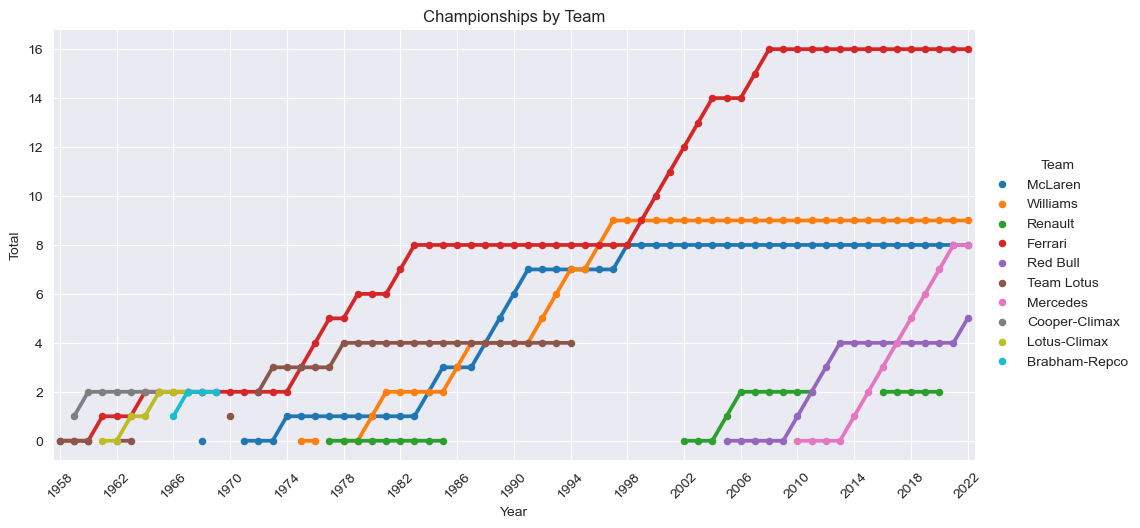

In [255]:
fig = sns.catplot(data=df_final.loc[df_final['total_champs'] > 1], legend=False, kind='point', x='year', hue='name_co', y='cum_champs', markers='.', aspect=2)
fig.add_legend(title='Team')
fig.set(title='Championships by Team')
fig.set_axis_labels('Year', 'Total')
fig.set_xticklabels(step=4, rotation=45)
fig.ax.grid(color='white')
plt.show()

In [256]:
# subset data to show 2004 to present
temp2004 = df_final.loc[df.year>=2004]

In [259]:
# create a column that indicates the percent of total points for each team, each year
temp2004['percent_pts'] = temp2004['points'] / temp2004.groupby('year')['points'].transform('sum')

/var/folders/3z/d_msg6bj2ksf6j2jt9jvn0h80000gn/T/ipykernel_3408/1112922956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2004['percent_pts'] = temp2004['points'] / temp2004.groupby('year')['points'].transform('sum')


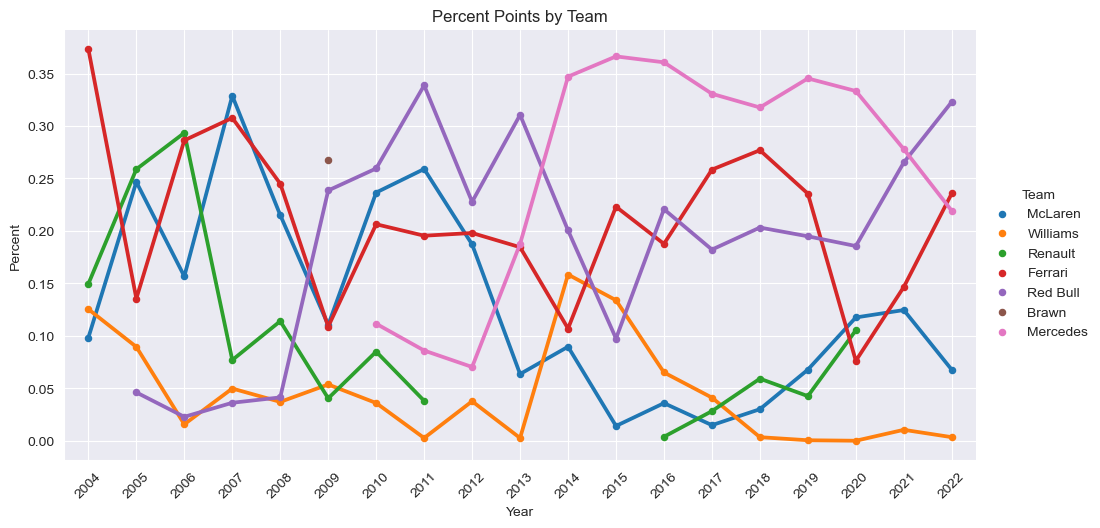

In [266]:
# .loc[temp2004['total_champs'] > 0]
fig = sns.catplot(data=temp2004.loc[temp2004['total_champs'] > 0], legend=False, kind='point', x='year', hue='name_co', y='percent_pts', markers='.', aspect=2)
fig.add_legend(title='Team')
fig.set(title='Percent Points by Team')
fig.set_axis_labels('Year', 'Percent')
fig.set_xticklabels(rotation=45)
fig.ax.grid(color='white')
plt.show()

In [272]:
# import budget from 2014 to present and merge with dataframe
budget_df = pd.read_csv('budgets_2013_2023.csv')
budget_df.info()
temp2004 = temp2004.merge(budget_df, on=['constructorRef', 'year'], suffixes=('_left','_right'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   constructorRef   113 non-null    object 
 1   year             113 non-null    int64  
 2   budget_millions  113 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ KB


In [279]:
temp2004['pct_budget'] = temp2004['budget_millions'] / temp2004.groupby('year')['budget_millions'].transform('sum')
temp2004.sort_values(by='year').tail(20)

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,year,round,name,constructorRef,name_co,total_rounds,is_final_round,is_champ,cum_champs,total_champs,percent_pts,budget_millions,pct_budget
49,27924,1073,9,585.5,2,2,11,2021,22,Abu Dhabi Grand Prix,red_bull,Red Bull,22,True,0,4,5,0.265232,145.0,0.1
48,27924,1073,9,585.5,2,2,11,2021,22,Abu Dhabi Grand Prix,red_bull,Red Bull,22,True,0,4,5,0.265232,145.0,0.1
68,27928,1073,117,77.0,7,7,0,2021,22,Abu Dhabi Grand Prix,aston_martin,Aston Martin,22,True,0,0,0,0.034881,145.0,0.1
78,27923,1073,131,613.5,1,1,9,2021,22,Abu Dhabi Grand Prix,mercedes,Mercedes,22,True,1,8,8,0.277916,145.0,0.1
99,27927,1073,213,142.0,6,6,0,2021,22,Abu Dhabi Grand Prix,alphatauri,AlphaTauri,22,True,0,0,0,0.064326,145.0,0.1
18,27931,1073,3,23.0,8,8,0,2021,22,Abu Dhabi Grand Prix,williams,Williams,22,True,0,9,9,0.010419,145.0,0.1
8,27925,1073,1,275.0,4,4,1,2021,22,Abu Dhabi Grand Prix,mclaren,McLaren,22,True,0,8,8,0.124575,145.0,0.1
66,27929,1073,51,13.0,9,9,0,2021,22,Abu Dhabi Grand Prix,alfa,Alfa Romeo,22,True,0,0,0,0.005889,145.0,0.1
101,27930,1073,214,155.0,5,5,1,2021,22,Abu Dhabi Grand Prix,alpine,Alpine F1 Team,22,True,0,0,0,0.070215,145.0,0.1
94,27932,1073,210,0.0,10,10,0,2021,22,Abu Dhabi Grand Prix,haas,Haas F1 Team,22,True,0,0,0,0.000000,145.0,0.1


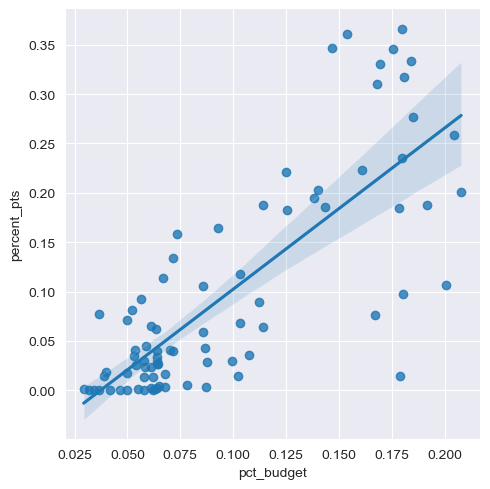

In [280]:
sns.lmplot(data=temp2004.loc[temp2004['year']<2021], x='pct_budget', y='percent_pts')
plt.show()

In [17]:
df.constructorRef.unique()

array(['mclaren', 'bmw_sauber', 'williams', 'renault', 'toro_rosso',
       'ferrari', 'toyota', 'super_aguri', 'red_bull', 'force_india',
       'honda', 'spyker', 'mf1', 'spyker_mf1', 'sauber', 'bar', 'jordan',
       'minardi', 'jaguar', 'prost', 'arrows', 'benetton', 'brawn',
       'stewart', 'tyrrell', 'lola', 'ligier', 'forti', 'footwork',
       'pacific', 'simtek', 'team_lotus', 'larrousse', 'brabham',
       'dallara', 'fondmetal', 'march', 'ags', 'lambo', 'leyton',
       'coloni', 'eurobrun', 'osella', 'onyx', 'life', 'rial', 'zakspeed',
       'ram', 'alfa', 'spirit', 'toleman', 'ats', 'theodore',
       'fittipaldi', 'ensign', 'shadow', 'wolf', 'merzario', 'kauhsen',
       'rebaque', 'surtees', 'hesketh', 'martini', 'brm', 'penske', 'lec',
       'mcguire', 'boro', 'apollon', 'kojima', 'parnelli', 'maki', 'hill',
       'lyncar', 'trojan', 'amon', 'token', 'iso_marlboro', 'tecno',
       'matra', 'politoys', 'connew', 'bellasi', 'tomaso', 'cooper',
       'lds', 'protos'

In [93]:
df.constructorId.nunique()

159

In [110]:
races_df.loc[races_df.raceId == 674]

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
673,674,1968,8,20,German Grand Prix,1968-08-04,\N,http://en.wikipedia.org/wiki/1968_German_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [109]:
constructors_df.loc[constructors_df.constructorId==1]

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


Full outer exclusion join example code

In [ ]:
merge1 = constructor_standings_df.merge(constructor_results_df, on=['raceId','constructorId'], how='outer', indicator=True)\
.query('_merge != "both"').drop('_merge', 1)